In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [ ]:
def get_sjodp(url):
    
    # Author: Juliu
    # s Cheng
    
    js  = json.loads(requests.get(url).text)

    cols = []
    for item in js['result']['fArray']:
        if not item.get('fHeader'):
            break
        cols.append(item['fStr'])

    data = [[] for col in cols]
    for i, item in enumerate(js['result']['fArray']):
        if item.get('fHeader'):
            continue
        elif item.get('fStr'):
            data[i % len(cols)].append(item['fStr'])
        elif item.get('fNum'):
            data[i % len(cols)].append(item['fNum'])
        else:
            data[i % len(cols)].append('NaN')

    data_dict = dict(x for x in zip(cols, data))
    return data_dict

In [93]:
url = 'http://api.data.sanjoseca.gov/api/v2/datastreams/911-CALL-DATA/data.json/?auth_key=db647c82ee835f3e289d09ab471cea48d30e156b&limit=50000'

In [20]:
url = "http://api.data.sanjoseca.gov/api/v2/datastreams/MEDIA-HOME-PRICE/data.json/?auth_key=db647c82ee835f3e289d09ab471cea48d30e156b"

In [94]:
data = get_sjodp(url)
df = pd.DataFrame.from_dict(data)

In [104]:
df['CALL_TYPE'].value_counts()[0:15]

DISTURBANCE                       94
VEHICLE STOP                      93
ALARM, AUDIBLE                    77
PARKING VIOLATION                 66
WELFARE CHECK                     49
SUSPICIOUS VEHICLE                44
STOLEN VEHICLE                    40
SUSPICIOUS PERSON                 40
DISTURBANCE, FAMILY               29
UNK TYPE 911 CALL                 29
VEHICLE STOP ON FEMALE            25
SUSPICIOUS CIRCUMSTANCES          23
WELFARE CHECK (COMBINED EVENT)    21
RECOVERED STOLEN VEHICLE          21
MEET THE CITIZEN                  20
Name: CALL_TYPE, dtype: int64

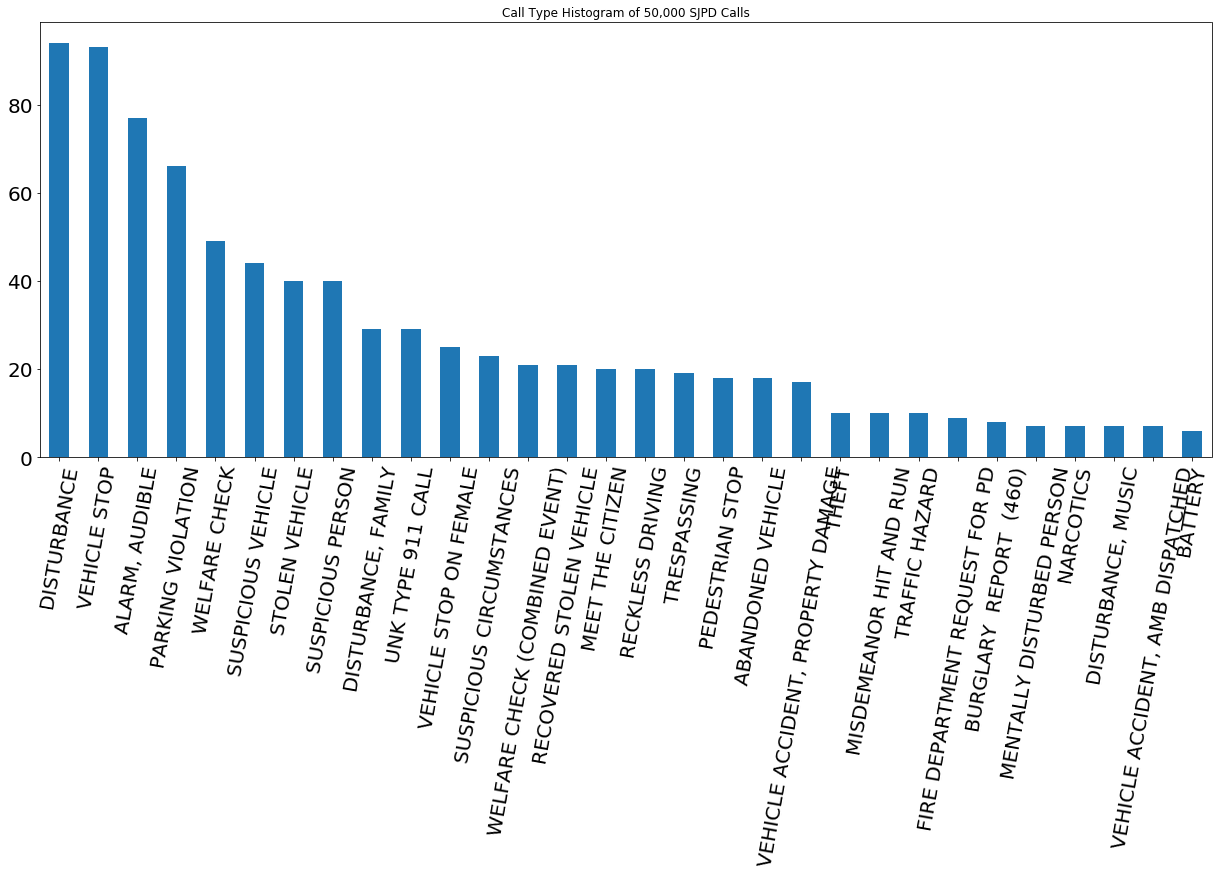

In [110]:
fig = plt.figure(figsize=(21,8))
plt.title('Call Type Histogram of 50,000 SJPD Calls')
df['CALL_TYPE'].value_counts()[0:30].plot(kind='bar', rot=80, fontsize=20)
plt.savefig('police_hist.png')
plt.show()

In [108]:
df.plot?

In [79]:
df.describe(include='all')

,ADDRESS,CALLTYPE_CODE,CALL_NUMBER,CALL_TYPE,CDTS,CITY,COMMON_PLACE_NAME,EID,FINAL_DISPO,FINAL_DISPO_CODE,OFFENSE_DATE,OFFENSE_TIME,PRIORITY,REPORT_DATE,STATE
count,999,999,999,999,999,999,999,999,999,999,9.990000e+02,999,999,9.990000e+02,999
unique,778,104,979,104,992,1,160,977,16,18,NaN,975,6,NaN,1
top,NaN,415,P181231035,DISTURBANCE,20180503050121PD,San Jose,NaN,7160962,No report required; dispatch record only,N,NaN,PT22H52M30S,3,NaN,CA
freq,28,94,3,94,2,999,783,4,412,412,NaN,3,334,NaN,999
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.525297e+12,NaN,NaN,1.525297e+12,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.571231e+07,NaN,NaN,2.571231e+07,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.525219e+12,NaN,NaN,1.525219e+12,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.525306e+12,NaN,NaN,1.525306e+12,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.525306e+12,NaN,NaN,1.525306e+12,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.525306e+12,NaN,NaN,1.525306e+12,NaN
